# Author Muhammed
# data: 9/12/2020

In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from helper import plot_boundary

In [17]:
# data = pd.read_csv('data.csv')
# data.head()
# X, y = data.drop(columns='y'), data['y']
# print("X:")
# print(X.head())
# print("y:")
# print(y)
# print(data.shape)

X:
         x1        x2
0  0.336494 -0.985951
1 -0.011043 -0.105529
2  0.238160 -0.617417
3 -0.366783 -0.713819
4  1.221923 -1.039399
y:
0    -1.0
1     1.0
2     1.0
3     1.0
4    -1.0
     ... 
95   -1.0
96   -1.0
97    1.0
98    1.0
99    1.0
Name: y, Length: 100, dtype: float64
(100, 3)


In [47]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

In [66]:
def draw_learning_curve(estimators, X, y,titles=None, cv=None, num_trainings=5,shuffle = True, random_state=1, return_times =True):
    for i, estimator in enumerate(estimators):
        train_sizes, train_scores, valid_scores, fit_times, _ =learning_curve(
            estimator, X, y, train_sizes=np.linspace(0.1,1, num_trainings),
            shuffle = shuffle, random_state= random_state, cv=cv, scoring= None, n_jobs=-1, return_times=return_times)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)
        plt.figure(figsize=[20,5])
        
        if return_times:
            plt.subplot(1,2,1)
            plt.plot(train_sizes, np.mean(fit_times, axis=1),'-ob')
            plt.xlabel("Training examples")
            plt.ylabel("fit_times")
            plt.title("Scalability of the model")
            plt.subplot(1,2,2)
        plt.plot(train_sizes, train_scores_mean,'-og', label="Trainining score")
        plt.plot(train_sizes, valid_scores_mean,'-or', label="Cross Validation score")   
        plt.xticks(train_sizes)
        plt.grid()
        if titles is None:
            plt.title("Learning Curve")
        else:
            plt.title(f"Learning Curve {titles[i]}")
        plt.xlabel('Num of training data')
        plt.ylabel('Score')
        plt.legend(loc="best")
        plt.ylim(0.7,1.01)
        plt.show()

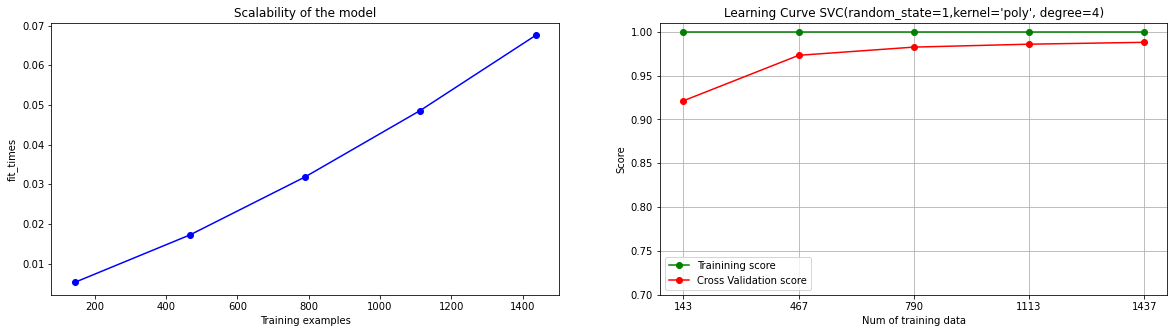

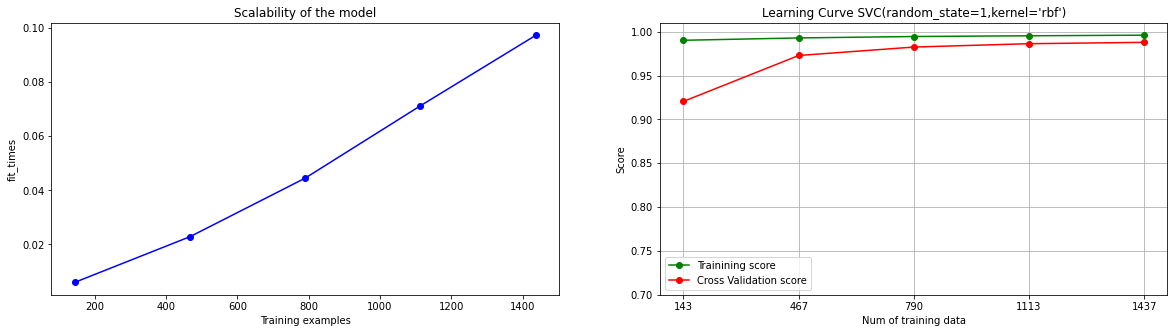

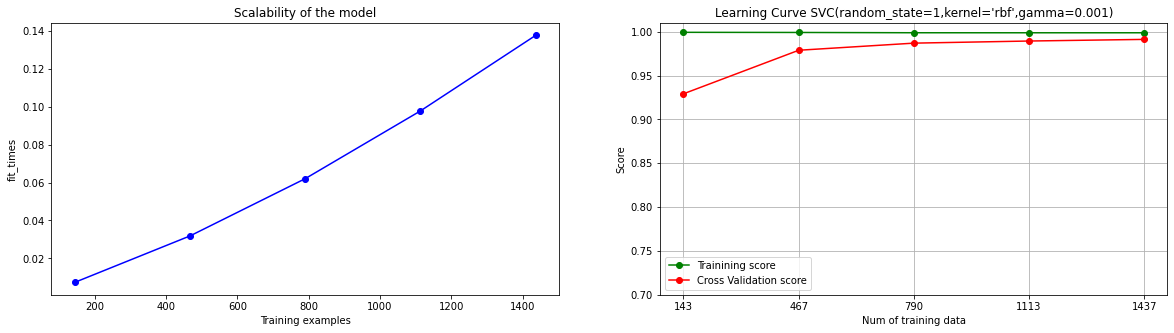

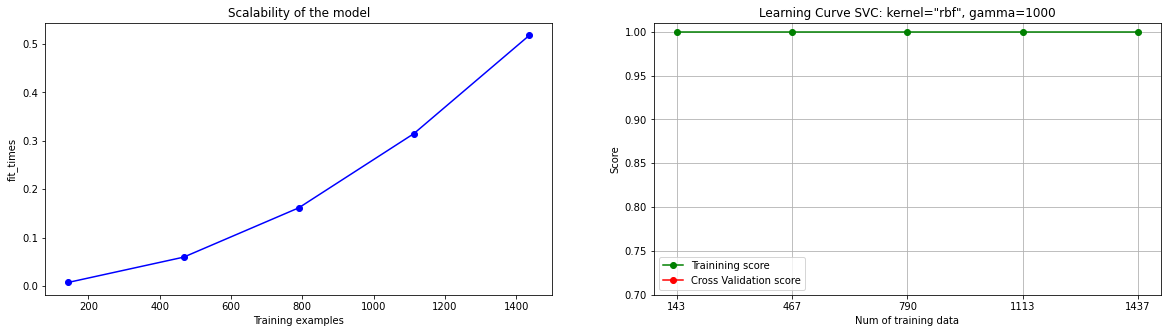

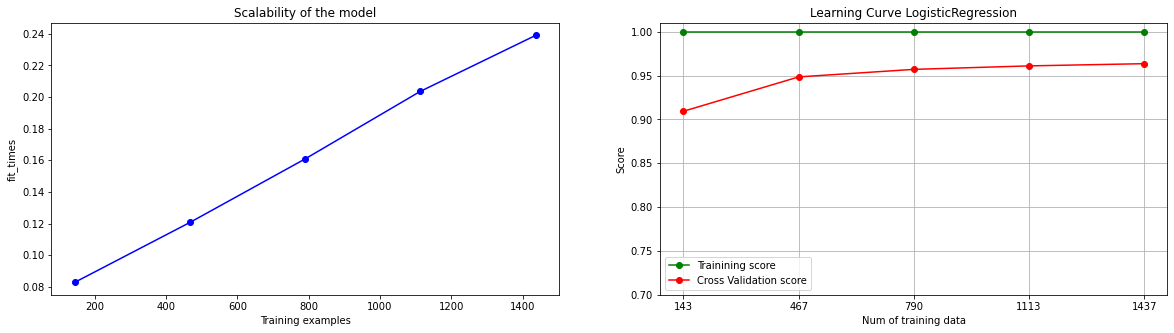

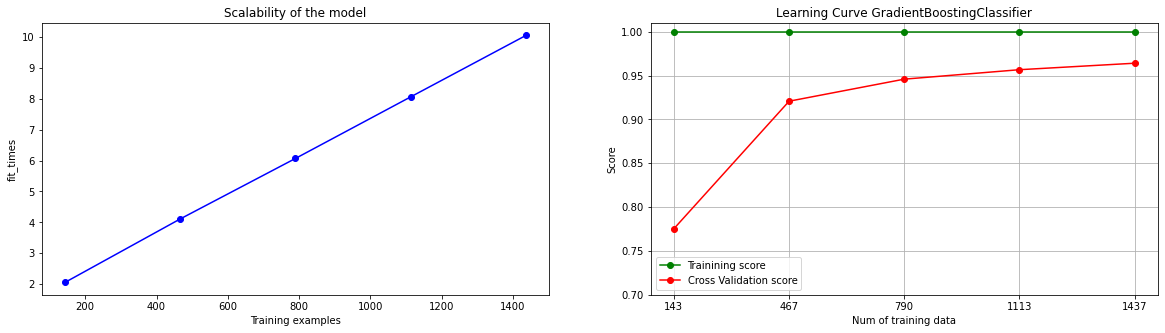

In [67]:
estimators = [
              SVC(random_state=1,kernel='poly', degree=4),
              SVC(random_state=1,kernel='rbf'),
              SVC(random_state=1,kernel='rbf',gamma=0.001),
              SVC(random_state=1,kernel='rbf', gamma=1000),
              LogisticRegression(random_state=1),
              GradientBoostingClassifier(random_state=1)
             ]
titles = [
    
    "SVC(random_state=1,kernel='poly', degree=4)",
    "SVC(random_state=1,kernel='rbf')",
    "SVC(random_state=1,kernel='rbf',gamma=0.001)",
    'SVC: kernel="rbf", gamma=1000',
    'LogisticRegression',
    'GradientBoostingClassifier'
]
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
draw_learning_curve(estimators, X, y, titles=titles,cv=cv)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
model = SVC(random_state=1, kernel='poly', degree=2)
model.fit(X_train, y_train)
plot_boundary(model, X_test, y_test,'SVM')
print(classification_report(y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, y_test)


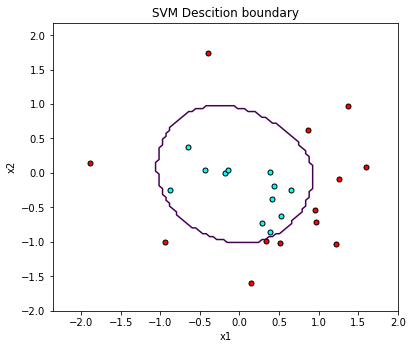

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



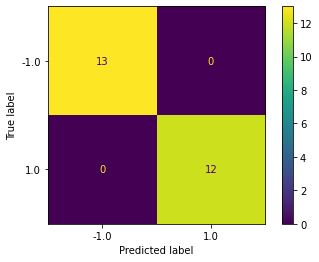

In [37]:
model = SVC(random_state=1, kernel='rbf')
model.fit(X_train, y_train)
plot_boundary(model, X_test, y_test,'SVM')
print(classification_report(y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, y_test)


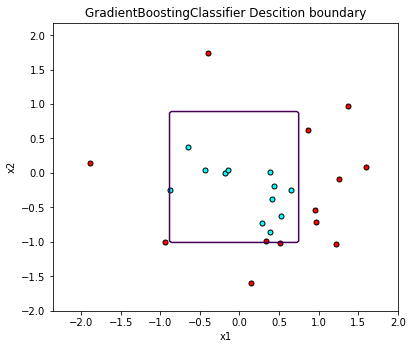

              precision    recall  f1-score   support

        -1.0       1.00      0.85      0.92        13
         1.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



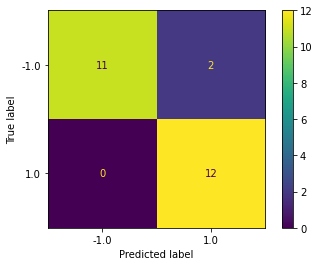

In [45]:
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train, y_train)
plot_boundary(model, X_test, y_test,'GradientBoostingClassifier')
print(classification_report(y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, y_test)


In [39]:
              LogisticRegression(random_state=1)

LogisticRegression(random_state=1)

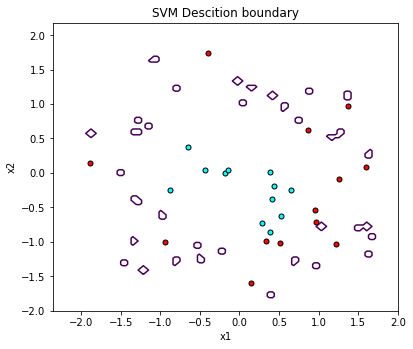

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        13
         1.0       0.48      1.00      0.65        12

    accuracy                           0.48        25
   macro avg       0.24      0.50      0.32        25
weighted avg       0.23      0.48      0.31        25



/home/muhammed/anaconda3/envs/machine_learning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


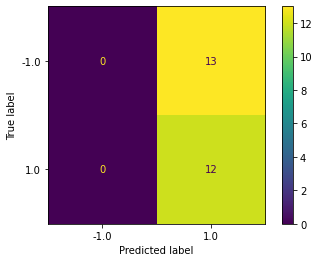

In [40]:
model = SVC(kernel='rbf', gamma=1000)
model.fit(X_train, y_train)
plot_boundary(model, X_test, y_test,'SVM')
print(classification_report(y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, y_test)


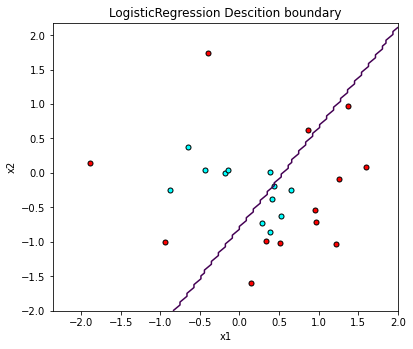

              precision    recall  f1-score   support

        -1.0       0.60      0.69      0.64        13
         1.0       0.60      0.50      0.55        12

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.59        25
weighted avg       0.60      0.60      0.60        25



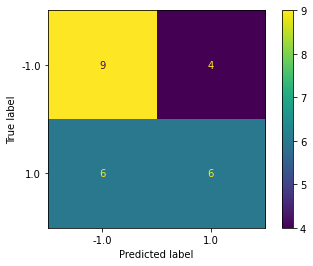

In [44]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
plot_boundary(model, X_test, y_test,'LogisticRegression')
print(classification_report(y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, y_test)
